<a href="https://colab.research.google.com/github/sumaia42/Deep_learning/blob/main/used_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-mri-images-for-brain-tumor-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F165566%2F377107%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T183840Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D56fe434c729b81defa3dcee539da25ea5a2ab96ca430cc59b54503a43f952c7b8e36f4d2b64549446af232525aed42cf09caac2c9c721de5d2b16392c32bc2ca5b45f9ab592d42b3377fde845f161bb11d209e8ca975e78d0a07b64408cd5688aaa7864d9d3c779f238ae93db121e658b81dbffbb75ccb236bf1d52a57da2467f06bb87fe9737bf0a6fc27e20da20bb884678540f08c4ea2cb2b8dceb9c998487e4a41831853f3f855ccac449a3f32bc29f426957c3e5767c31fbf82a48bbb502cdd7f21c4377e0e4ad9dccc2098b13fdd0ab517cc7d784406980c16f7c2329b6766002739b3075be3aec8ea47f83674cd5fc00c24eae2d095c166b4ade8e291'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 15828590 bytes downloaded
Downloaded and uncompressed: brain-mri-images-for-brain-tumor-detection
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y16.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y53.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y98.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y67.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y47.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y51.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y9.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y74.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y81.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y2.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y159.JPG
/kaggle/input/brain-mr

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [4]:
all_data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"

In [5]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection

brain_tumor_dataset  no  yes


In [6]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/yes

Y100.JPG  Y116.JPG  Y159.JPG  Y181.jpg	Y21.jpg   Y254.jpg  Y34.jpg  Y50.JPG  Y6.jpg   Y8.jpg
Y101.jpg  Y117.JPG  Y15.jpg   Y182.JPG	Y22.jpg   Y255.JPG  Y35.jpg  Y51.jpg  Y70.jpg  Y90.jpg
Y102.jpg  Y11.jpg   Y160.JPG  Y183.jpg	Y23.JPG   Y256.JPG  Y36.JPG  Y52.jpg  Y71.JPG  Y91.jpg
Y103.jpg  Y120.JPG  Y161.JPG  Y184.JPG	Y242.JPG  Y257.jpg  Y37.jpg  Y53.jpg  Y73.jpg  Y92.jpg
Y104.jpg  Y12.jpg   Y162.jpg  Y185.jpg	Y243.JPG  Y258.JPG  Y38.jpg  Y54.jpg  Y74.jpg  Y92.png
Y105.jpg  Y13.jpg   Y163.JPG  Y186.jpg	Y244.JPG  Y259.JPG  Y39.jpg  Y55.jpg  Y75.JPG  Y95.jpg
Y106.jpg  Y146.JPG  Y164.JPG  Y187.jpg	Y245.jpg  Y25.jpg   Y3.jpg   Y56.jpg  Y76.jpg  Y96.jpg
Y107.jpg  Y147.JPG  Y165.JPG  Y188.jpg	Y246.JPG  Y26.jpg   Y40.JPG  Y58.JPG  Y77.jpg  Y97.JPG
Y108.jpg  Y148.JPG  Y166.JPG  Y18.JPG	Y247.JPG  Y27.jpg   Y41.jpg  Y59.JPG  Y78.jpg  Y98.JPG
Y109.JPG  Y14.jpg   Y167.JPG  Y192.JPG	Y248.JPG  Y28.jpg   Y42.jpg  Y60.jpg  Y79.jpg  Y99.JPG
Y10.jpg   Y153.jpg  Y168.jpg  Y193.JPG	Y249.JPG  Y29.jpg   Y44

In [7]:
!ls /kaggle/input/brain-mri-images-for-brain-tumor-detection/no

'10 no.jpg'  '24 no.jpg'  '37 no.jpg'	'4 no.jpg'    N21.jpg	    No16.jpg	'no 89.jpg'
'11 no.jpg'  '25 no.jpg'  '38 no.jpg'	'50 no.jpg'   N22.JPG	    No17.jpg	'no 8.jpg'
'12 no.jpg'  '26 no.jpg'  '39 no.jpg'	'5 no.jpg'    N26.JPG	    No18.jpg	'no 90.jpg'
'13 no.jpg'  '27 no.jpg'  '3 no.jpg'	'6 no.jpg'    N2.JPG	    No19.jpg	'no 91.jpeg'
'14 no.jpg'  '28 no.jpg'  '40 no.jpg'	'7 no.jpg'    N3.jpg	   'no 1.jpg'	'no 923.jpg'
'15 no.jpg'  '29 no.jpg'  '41 no.jpg'	'8 no.jpg'    N5.jpg	    No20.jpg	'no 92.jpg'
'17 no.jpg'  '2 no.jpeg'  '42 no.jpg'	'9 no.jpg'    N6.jpg	    No21.jpg	'no 94.jpg'
'18 no.jpg'  '30 no.jpg'  '43 no.jpg'	 N11.jpg     'no 100.jpg'   No22.jpg	'no 95.jpg'
'19 no.jpg'  '31 no.jpg'   44no.jpg	 N15.jpg     'no 10.jpg'   'no 2.jpg'	'no 96.jpg'
'1 no.jpeg'  '32 no.jpg'  '45 no.jpg'	 N16.jpg      No11.jpg	   'no 3.jpg'	'no 97.jpg'
'20 no.jpg'  '33 no.jpg'  '46 no.jpg'	 N17.jpg      No12.jpg	   'no 4.jpg'	'no 98.jpg'
'21 no.jpg'  '34 no.jpg'  '47 no.jpg'	 N19.JPG      No13.jpg	

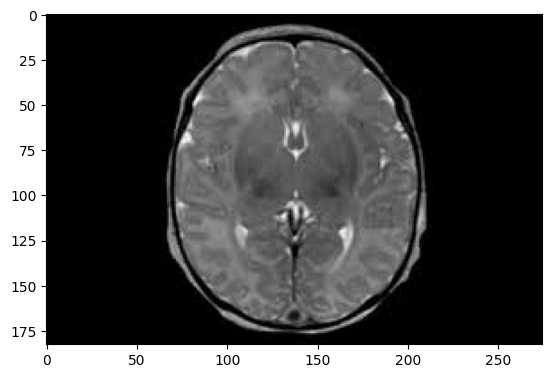

In [8]:
img = mpimg.imread("/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/12 no.jpg")
plt.imshow(img)

In [9]:
img.shape

(183, 275, 3)

In [10]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (530, 380, 3)


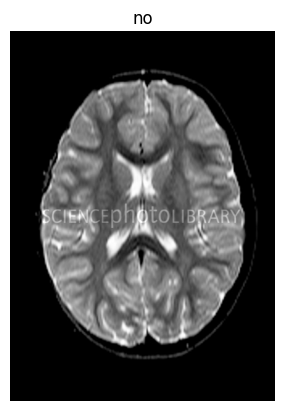

In [11]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="no")

Image shape: (324, 272, 3)


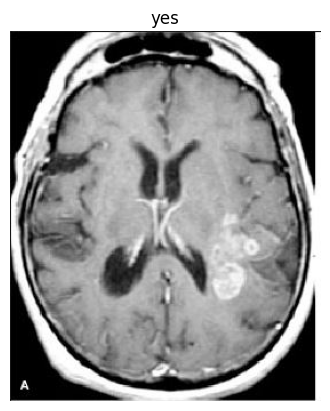

In [12]:
img_no = view_random_image(target_dir="/kaggle/input/brain-mri-images-for-brain-tumor-detection/",
                        target_class="yes")

In [13]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [14]:
train_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = generator.flow_from_directory(all_data_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [15]:
test_data


In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/50
8/8 [==============================] - 102s 12s/step - loss: 0.6647 - accuracy: 0.5929 - val_loss: 0.5442 - val_accuracy: 0.7747
Epoch 2/50
8/8 [==============================] - 89s 11s/step - loss: 0.5816 - accuracy: 0.7115 - val_loss: 0.5099 - val_accuracy: 0.7787
Epoch 3/50
8/8 [==============================] - 88s 11s/step - loss: 0.5439 - accuracy: 0.7589 - val_loss: 0.5331 - val_accuracy: 0.7233
Epoch 4/50
8/8 [==============================] - 89s 11s/step - loss: 0.5289 - accuracy: 0.7668 - val_loss: 0.5024 - val_accuracy: 0.7549
Epoch 5/50
8/8 [==============================] - 86s 11s/step - loss: 0.4905 - accuracy: 0.7945 - val_loss: 0.4578 - val_accuracy: 0.7905
Epoch 6/50
8/8 [==============================] - 87s 11s/step - loss: 0.4557 - accuracy: 0.7866 - val_loss: 0.4336 - val_accuracy: 0.7945
Epoch 7/50
8/8 [==============================] - 86s 11s/step - loss: 0.4464 - accuracy: 0.8142 - val_loss: 0.3963 - val_accuracy: 0.8458
Epoch 8/50
8/8 [==========

In [ ]:
model.evaluate(test_data)